2024.07.10 (수) - DAY7 데이터 시각화 1 / 실습 과제

# 데이터 시각화 I 실습

막대그래프, 선그래프, 히스토그램, 파이차트, 산점도, 박스플롯을 구현해봅니다.

실습에 사용하는 데이터는 https://www.kaggle.com/datasets/nikhil7280/weather-type-classification 데이터입니다.

본인이 원하는 다른 데이터가 있다면 다른 데이터를 사용하셔도 좋습니다.

데이터에서 적절한 데이터를 선정하여 각 시각화 분석에 적용합니다.

시각화를 진행할 때는 차트 뿐만 아니라 범례, 제목, 레이블, 색상, 크기 등 여러가지 요소들을 직접 개발하시면서

데이터의 특성을 잘 이해해보시면 좋을 것 같습니다.

In [ ]:
# 기본 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
!unzip /content/weather_type_classification.zip

Archive:  /content/weather_type_classification.zip
  inflating: weather_classification_data.csv  


In [ ]:
data = pd.read_csv("weather_classification_data.csv")

In [ ]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
df = pd.DataFrame(data)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
print(df['Cloud Cover'].unique())
print(df['UV Index'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
[ 2  7  5  1  0  8 11  3  9  4 13 10 14  6 12]


In [ ]:
mean_UV = df.groupby('Cloud Cover')['UV Index'].mean()

# 결과 출력
print(mean_UV)

Cloud Cover
clear            7.870033
cloudy           7.447689
overcast         2.408046
partly cloudy    4.016667
Name: UV Index, dtype: float64


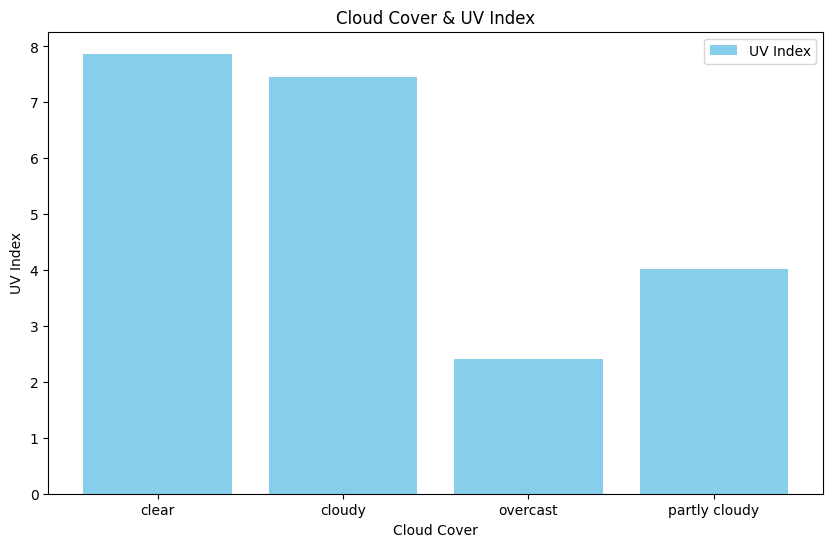

In [ ]:
# 1. 막대그래프

# Cloud Cover와 UV Index: Cloud가 많을수록 UV 값이 낮을까?

# 각 Cloud Cover별 UV Index의 평균 계산
mean_UV = df.groupby('Cloud Cover')['UV Index'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(mean_UV['Cloud Cover'], mean_UV['UV Index'], color='skyblue', label='UV Index')
plt.title('Cloud Cover & UV Index')
plt.xlabel('Cloud Cover')
plt.ylabel('UV Index')
plt.legend()
plt.show()

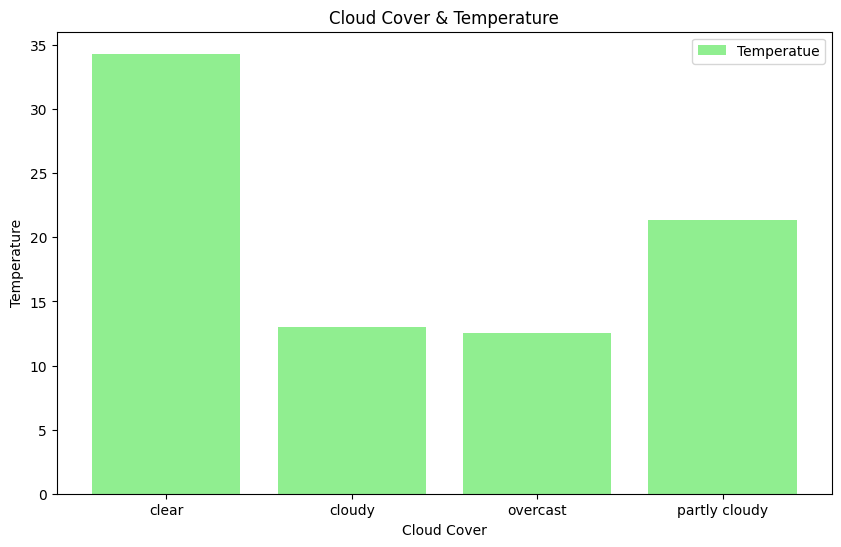

In [ ]:
# Cloud Cover와 Temperatue: Cloud가 적을 수록 Temperature가 높을까?

# 각 Cloud Cover별 Temperatue의 평균 계산
mean_T = df.groupby('Cloud Cover')['Temperature'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(mean_T['Cloud Cover'], mean_T['Temperature'], color='lightgreen', label='Temperatue')
plt.title('Cloud Cover & Temperature')
plt.xlabel('Cloud Cover')
plt.ylabel('Temperature')
plt.legend()
plt.show()

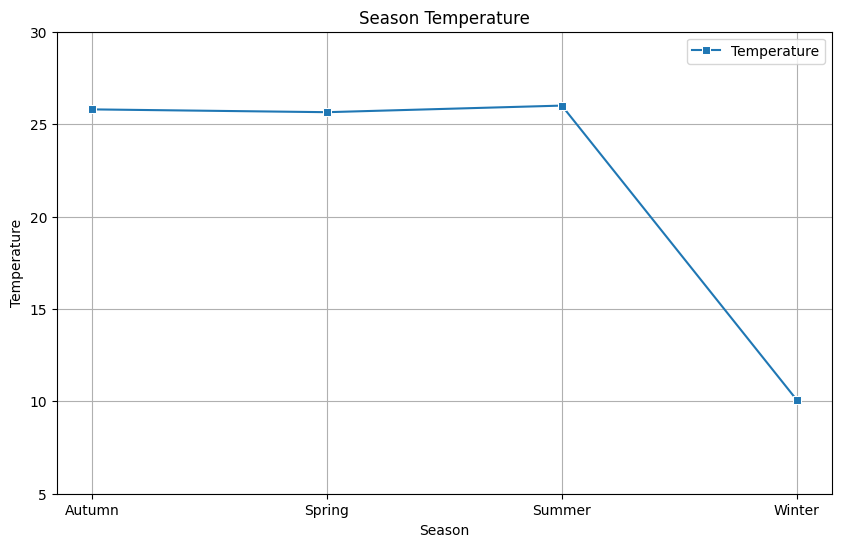

In [ ]:
# 2. 선그래프
# 여름이 평균 기온이 제일 높을까? 겨울이 평균 기온이 제일 낮을까?

# 각 계절별 평균 기온 계산
mean_S = df.groupby('Season')['Temperature'].mean().reset_index()

# 계절 순서
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

plt.figure(figsize=(10,6)) # 그래프 크기 설정
sns.lineplot(x='Season', y='Temperature', data=mean_S, marker='s', label='Temperature')
plt.title('Season Temperature') # 제목 추가
plt.xlabel('Season') # x축 레이블 추가
plt.ylabel('Temperature') # y축 레이블 추가
plt.ylim(5, 30)
plt.legend() # 범례 추가
plt.grid(True) # 그리드 추가
plt.show()

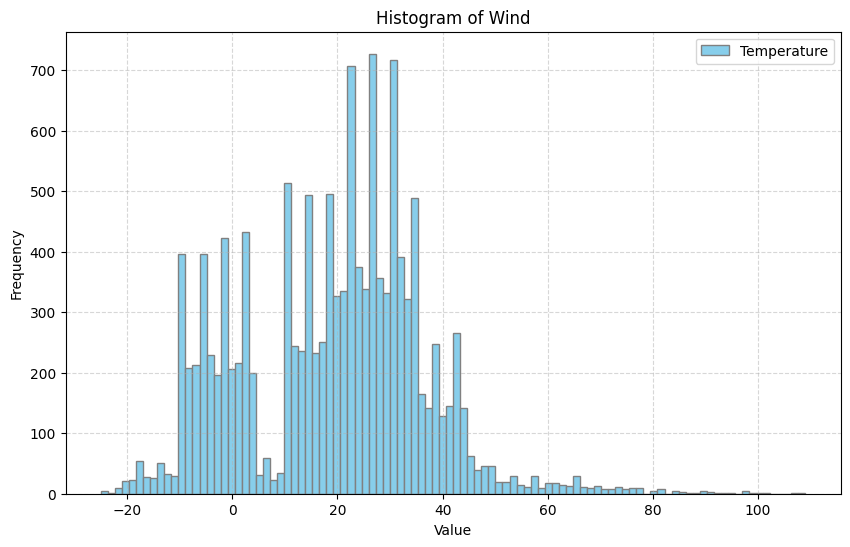

In [ ]:
# 3. 히스토그램

# 히스토그램 생성
plt.figure(figsize=(10, 6))

# 온도에 대한 히스토그램 그리기
plt.hist(df['Temperature'], bins=100, color='skyblue', edgecolor='gray', label='Temperature')

plt.title('Histogram of Wind')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [ ]:
print(df['Temperature'].unique())

[ 14.  39.  30.  38.  27.  32.  -2.   3.  28.  35.  12. -10.  24.  10.
  33.  43.  13.  -7.  26.   4.  17.  40.   2.  15.  29.  11.  -9.  36.
  42.  21.  22.  25.  -4.  -1.  -5.  41.  31.  16.  34.  49.  19.  23.
  20.  -3.  18.   1.   0.  46.  44. -13.  -6.  78.  63.  73.   8. -12.
 -24.  -8.  60.  48.   5.  51. -14.  50.  37.  54.  47.  70.   9.  66.
 -16. -15.  59.  80. -19.  52.  45.   6. -18. -11.  74.  76.  55. -20.
  57.  91.  82. -17.  61.   7.  53.  65.  77.  67.  64.  58.  68.  72.
  62.  71.  56. 107. -22.  75.  85.  97.  84. -21.  92. -25.  81. 109.
  98.  94.  90. -23.  88.  99.  69. 100.  89. 102.  86. 108.  87.  95.]


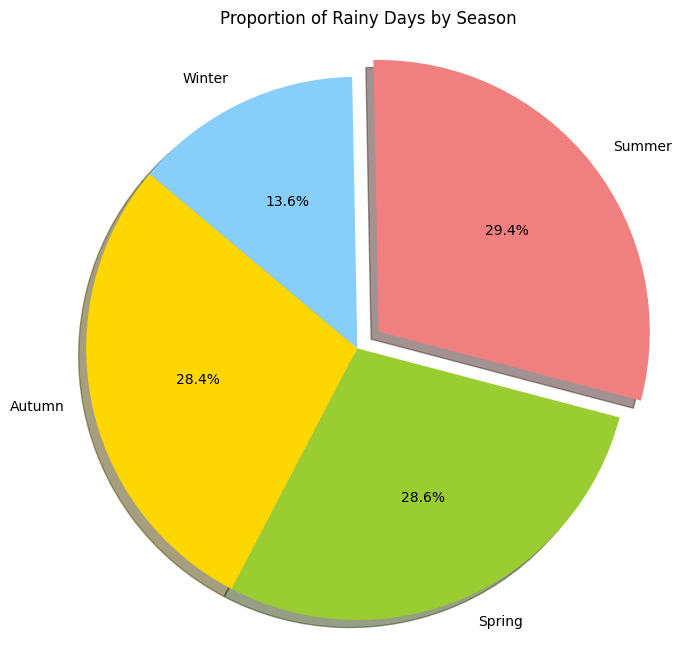

In [ ]:
# 4. 파이차트

# 각 계절(Season)별 비가오는 날씨(Weather Type - 'Rainy')의 비율
# 여름(Summer)에 제일 비가 많이 올까?

rainy_counts = df[df['Weather Type'] == 'Rainy'].groupby('Season').size()
total_counts = df.groupby('Season').size()
rainy_ratios = rainy_counts / total_counts


colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(rainy_ratios, explode=explode, labels=rainy_ratios.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Rainy Days by Season')
plt.axis('equal') # 원형을 유지하기 위해
plt.show()

In [ ]:
print(df['Weather Type'])
print(df['Weather Type'].unique())

0         Rainy
1        Cloudy
2         Sunny
3         Sunny
4         Rainy
          ...  
13195     Rainy
13196     Snowy
13197    Cloudy
13198     Snowy
13199     Rainy
Name: Weather Type, Length: 13200, dtype: object
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [ ]:
df['UV Index'].unique()

array([ 2,  7,  5,  1,  0,  8, 11,  3,  9,  4, 13, 10, 14,  6, 12])

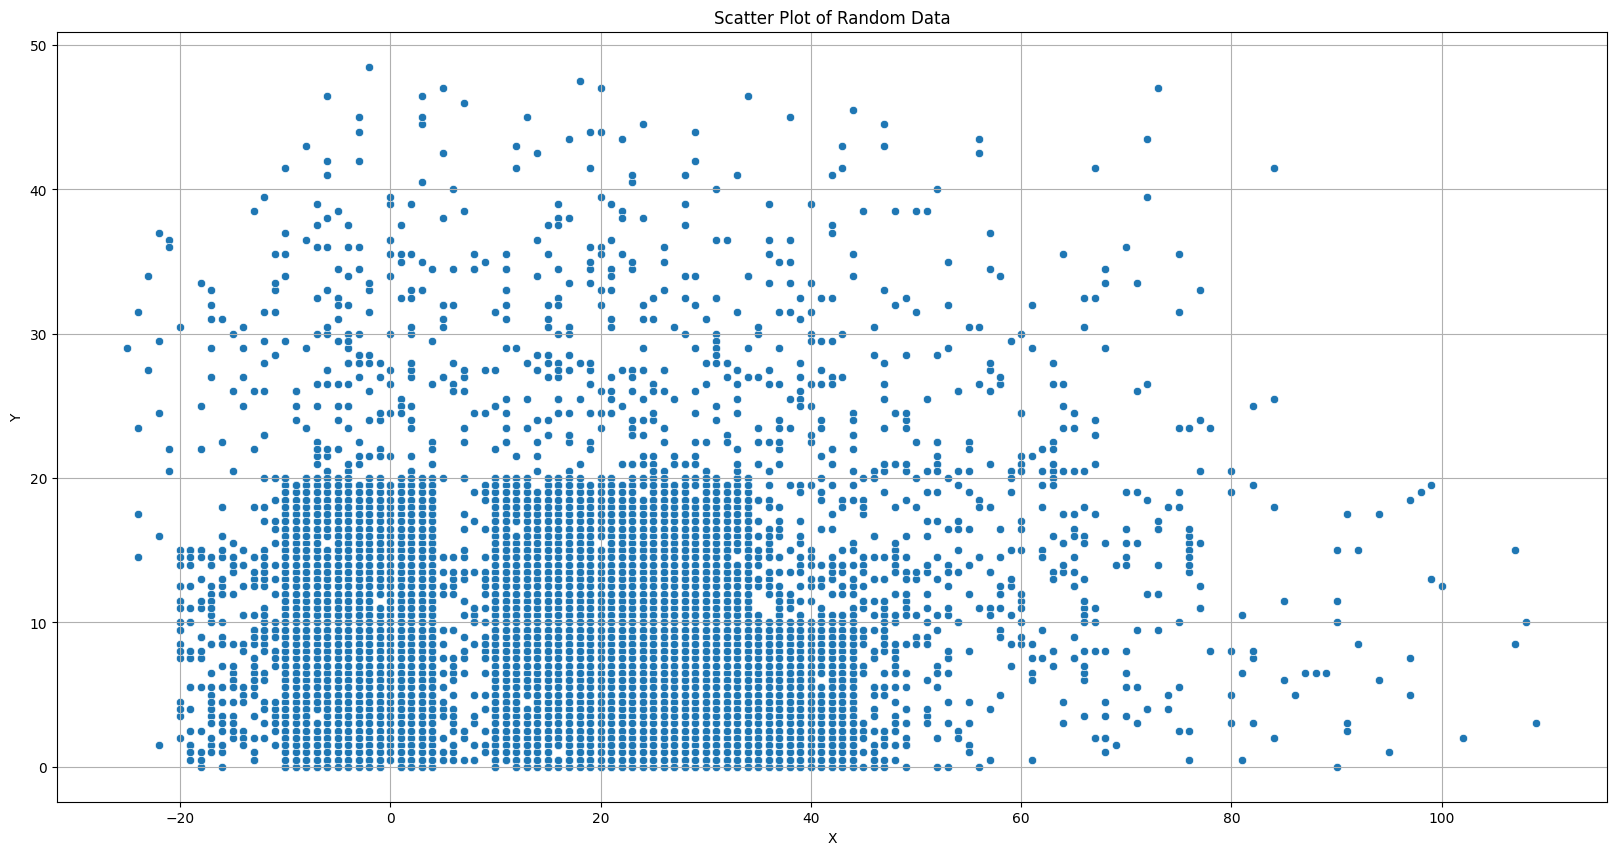

In [ ]:
# 5. 산점도

plt.figure(figsize=(20, 10)) # 그래프 크기 설정
sns.scatterplot(x='Temperature', y='Wind Speed', data=df)
plt.title('Scatter Plot of Temperature vs Wind Speed') # 제목 추가
plt.xlabel('X') # x축 레이블 추가
plt.ylabel('Y') # y축 레이블 추가
plt.grid(True) # 그리드 추가
plt.show()

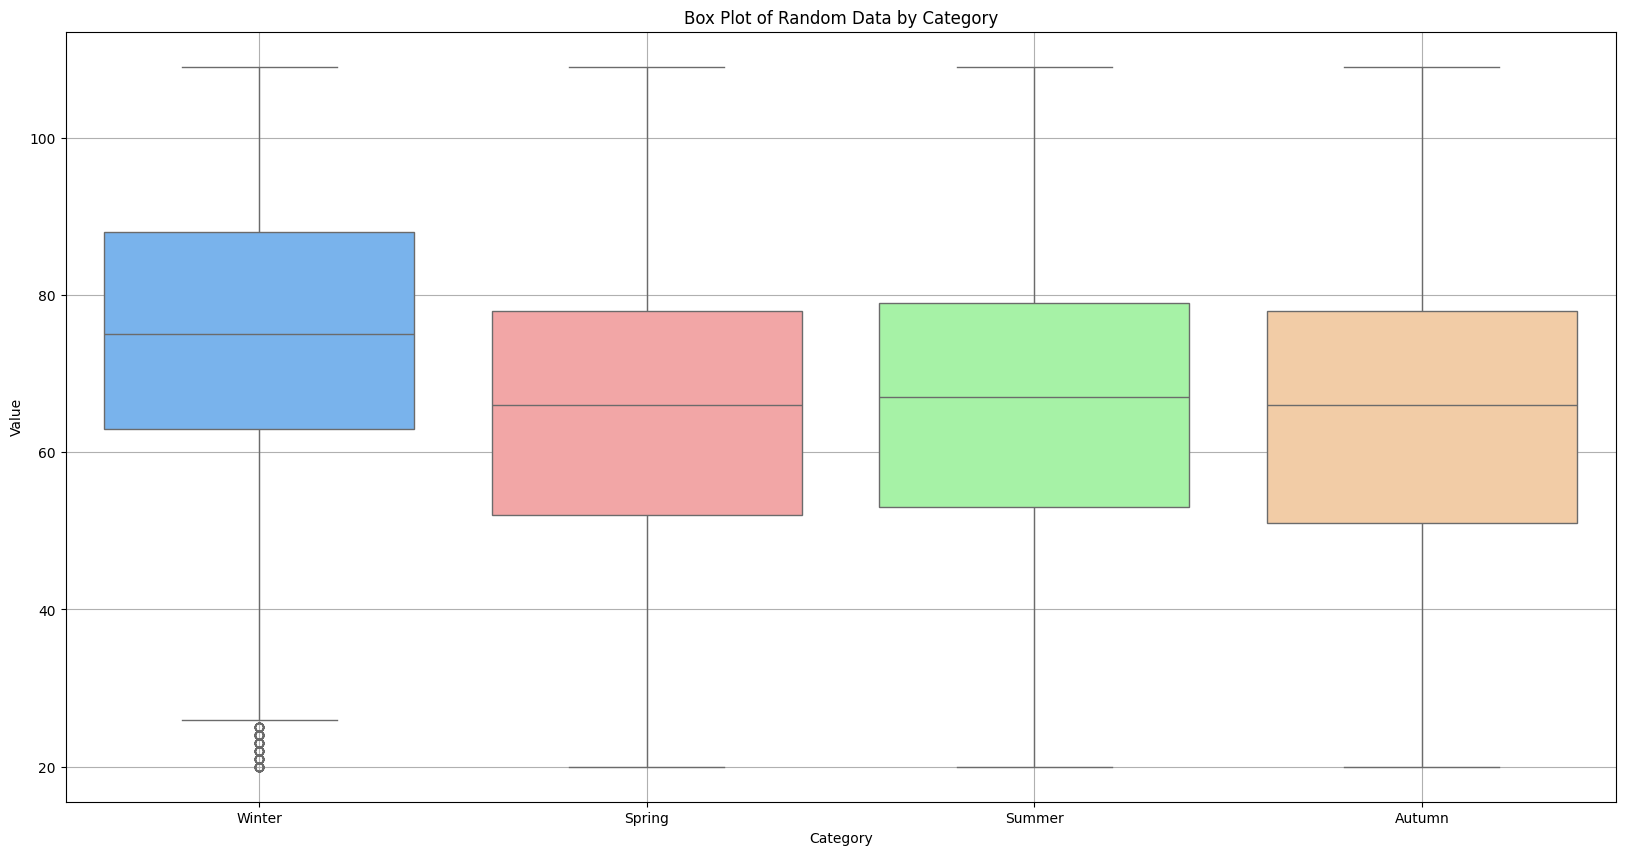

In [ ]:
# 6. 박스플롯
plt.figure(figsize=(20, 10)) # 그래프 크기 설정
sns.boxplot(x='Season', y='Humidity', data=df, hue='Season', palette = ['#66B3FF', '#FF9999', '#99FF99', '#FFCC99'])
plt.title('Box Plot of Random Data by Category') # 제목 추가
plt.xlabel('Category') # x축 레이블 추가
plt.ylabel('Value') # y축 레이블 추가
plt.grid(True) # 그리드 추가
plt.show()

# 겨울이 제일 습도가 높다?!

In [ ]:
df_2 = df.groupby('Season')['Humidity'].mean()

# 결과 출력
print(df_2)

Season
Autumn    64.748800
Spring    64.650885
Summer    65.534912
Winter    73.767380
Name: Humidity, dtype: float64


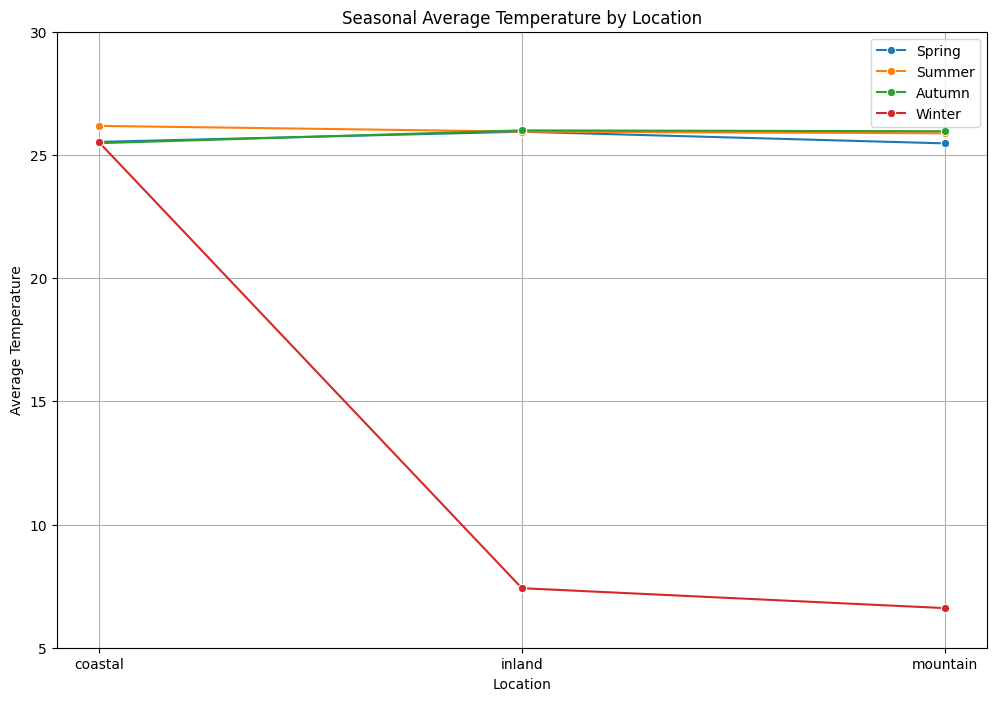

In [ ]:
# 7. 여러 시각화 차트 합쳐보기
# 위치(Location)별로 계절별 평균 온도를 선 그래프로 나타내기

# 각 계절별 평균 온도 계산
mean_temperature = df.groupby(['Location', 'Season'])['Temperature'].mean().reset_index()

plt.figure(figsize=(12,8)) # 그래프 크기 설정
sns.lineplot(x='Location', y='Temperature', data=mean_temperature[mean_temperature['Season'] == 'Spring'], marker='o', label='Spring')
sns.lineplot(x='Location', y='Temperature', data=mean_temperature[mean_temperature['Season'] == 'Summer'], marker='o', label='Summer')
sns.lineplot(x='Location', y='Temperature', data=mean_temperature[mean_temperature['Season'] == 'Autumn'], marker='o', label='Autumn')
sns.lineplot(x='Location', y='Temperature', data=mean_temperature[mean_temperature['Season'] == 'Winter'], marker='o', label='Winter')

plt.title('Seasonal Average Temperature by Location') # 제목 추가
plt.xlabel('Location') # x축 레이블 추가
plt.ylabel('Average Temperature') # y축 레이블 추가
plt.ylim(5, 30)  # 원하는 y축 범위 설정
plt.legend() # 범례 추가
plt.grid(True) # 그리드 추가
plt.show()

In [ ]:
mean_temperature = df.groupby(['Location', 'Season'])['Temperature'].mean().reset_index()
print(mean_temperature)

    Location  Season  Temperature
0    coastal  Autumn    25.476667
1    coastal  Spring    25.529279
2    coastal  Summer    26.178195
3    coastal  Winter    25.508602
4     inland  Autumn    25.996222
5     inland  Spring    25.941793
6     inland  Summer    25.946903
7     inland  Winter     7.416105
8   mountain  Autumn    25.960298
9   mountain  Spring    25.468860
10  mountain  Summer    25.877358
11  mountain  Winter     6.607452


In [ ]:
df = pd.DataFrame(data)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
